In [1]:
from signals import Sinusoid, Chirp
from recurrence_plots import RecurrencePlot, RecurrencePlotCalculator
from embeddings import LagEmbedding
from embeddings.utils import mutual_information, fnn
import numpy as np
import matplotlib.pyplot as plt
from signal_processing import PCA

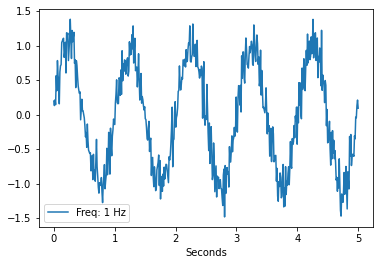

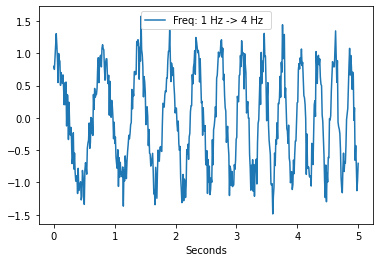

In [2]:
secs = 5
Fs = 100
s1 = Sinusoid(frequency=1, sec=secs, sampling_rate=Fs, noise_rate=0.2)
s1.show()
s2 = Chirp(frequency_start=1, frequency_end=4, sec=secs, sampling_rate=Fs, noise_rate=0.2)
s2.show()

In [3]:
s1.data.shape

(500, 1)

In [4]:
s = np.vstack([s1.data.T, s2.data.T]).T
s.shape
type(s)

numpy.ndarray

In [5]:
lag = mutual_information(s)

/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: divide by zero encountered in log
  I_matrix = Pxy*np.log(Pxy/(Px*Py))
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: invalid value encountered in multiply
  I_matrix = Pxy*np.log(Pxy/(Px*Py))


In [6]:
dim = fnn(s, lag=lag)

In [7]:
embedding = LagEmbedding(dim=int(dim), lag=lag)
print(f"Lag: {lag} | Dim: {dim}")

Lag: 12 | Dim: 3


In [8]:
calculator = RecurrencePlotCalculator(embedding=embedding, metric="cosine")
str(calculator)

"RecurrencePlotCalculator(metric='cosine', embedding=LagEmbedding(dim=3, lag=12))"

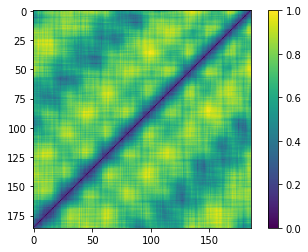

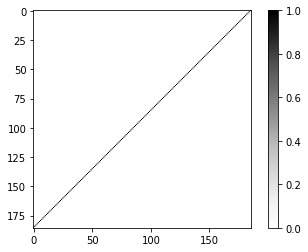

In [21]:
rp = calculator.generate(signal=s)
rp.normalize()
rp.show()

rp.show(thresholded=True, epsilon=0.1, cmap="Greys")

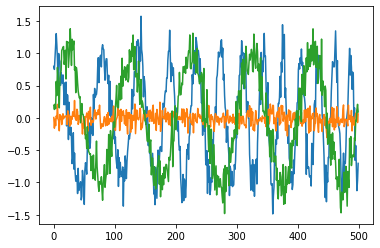

In [10]:
noise = np.random.normal(loc=0, scale = 0.1, size=s1.data.shape)
s = np.vstack([s2.data.T, noise.T, s1.data.T]).T
plt.plot(s)

[0.48243567 0.93793639 1.        ]
(array([1, 2]),)


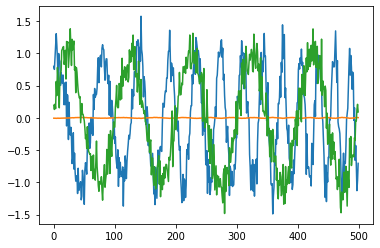

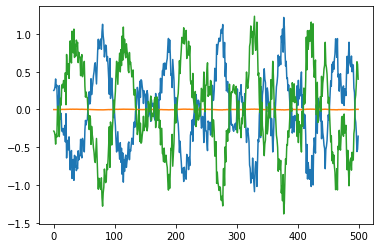

In [11]:
plt.plot(PCA(s, var = 0.9))
plt.show()
plt.plot(PCA(s, num_pcs=1))
plt.show()

In [12]:
from data_handling.physionet_reader import PhysioNetReader
import matplotlib.pyplot as plt

In [13]:
reader = PhysioNetReader(path="../data/single_lead/physionet_challenge/training2017")
ds = reader.get_dataset()

In [14]:
idx = 11
signal = ds[idx].x.T[:2000, :].reshape(-1, 1)

lag = mutual_information(signal)
dim = fnn(signal, lag=lag)

embedding = LagEmbedding(dim=int(dim), lag=lag)
print(f"Lag: {lag} | Dim: {dim}")

Lag: 35 | Dim: 9


/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: divide by zero encountered in log
  I_matrix = Pxy*np.log(Pxy/(Px*Py))
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: invalid value encountered in multiply
  I_matrix = Pxy*np.log(Pxy/(Px*Py))
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/FNN_n.py:72: RuntimeWarning: invalid value encountered in sqrt
  D_mp1 = np.sqrt(
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/FNN_n.py:76: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(abs(tsrecon[ind_m, -1]-tsrecon[ind, -1]), Dm)-Rtol,

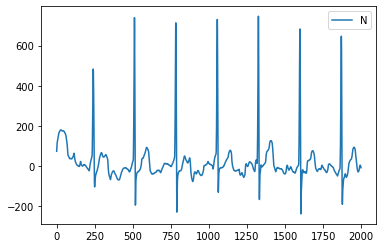

(2000, 1)

In [15]:
plt.plot(signal, label=ds[idx].y)
plt.legend()
plt.show()
signal.shape

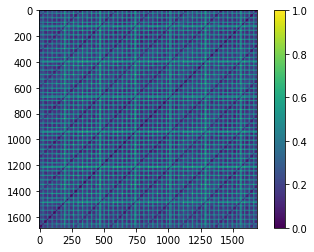

In [16]:
calculator = RecurrencePlotCalculator(embedding=embedding, metric="euclidean")
rp = calculator.generate(signal=signal)
rp.normalize()
rp.show()

In [17]:
ds[0]

DataPoint(x=array([[-127, -162, -197, ...,  -18,  -22,  -21]], dtype=int16), y='N')

In [18]:
from data_handling.data_reader import DataPoint
ds_uniform_length = [DataPoint(dp.x.T[:1000], dp.y) for dp in ds]

In [19]:
set(len(dp.x) for dp in ds_uniform_length)

{1000}

In [20]:
# ds_rp_s = calculator.generate_dataset([dp.x for dp in ds_uniform_length])